<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/IBM_Neighborhoods_HCM_city_(VN)_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project - The Battle of Neighborhoods (Week 1)

## 1. A description of the problem and a discussion of the background. (15 marks)

Business problem:

Currently I live in Distric 9 (Wards/Neighborhoods: Phuoc Long B, district 9), Ho Chi Minh city, Viet Nam. I will move to another location in distric 9 or Ho Chi Minh city in the future depend on my new job, so I 'd like to know:



*   Which neighborhoods in district 9 are closest to where I live (about utilities and services)
*   Which neighborhoods in Ho Chi Minh city are closest to where I live (about utilities and services)



## 2. A description of the data and how it will be used to solve the problem.

# Capstone Project - The Battle of Neighborhoods (Week 2)

In [ ]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install git+https://github.com/python-visualization/branca.git@master
# For unicode

In [ ]:
!pip install googlemaps

In [ ]:
import googlemaps
path='/content/drive/My Drive/Data/API location file.csv'
googlemap_key=pd.read_csv(path).API[1]
gmaps = googlemaps.Client(key=googlemap_key)

# Postal code Ho Chi Minh city (VN)

In [ ]:
path='/content/drive/My Drive/Data/Postal code HCM city.xlsx'
df=pd.read_excel(path)
df
# Wards = Neighborhoods. District = Borough

,STT,Wards,Post code,District
0,1,BC. Trung tâm quận 1,71000,Quận 1
1,2,Quận ủy,71001,Quận 1
2,3,Hội đồng nhân dân,71002,Quận 1
3,4,Ủy ban nhân dân,71003,Quận 1
4,5,Ủy ban Mặt trận Tổ quốc,71004,Quận 1
...,...,...,...,...
637,13,BCP. Cần Giờ,73350,Huyện Cần Giờ
638,14,BCP. Bình Khánh,73351,Huyện Cần Giờ
639,15,BC. Cần Thạnh,73352,Huyện Cần Giờ
640,16,BC. 30/4,73353,Huyện Cần Giờ


Remove all if not begin with P. or X. for real Wards (Neighborhoods)

In [ ]:
#df[df['Wards'].astype('str').str.startswith('P.')]
df[df['Wards'].str.startswith('P.')].shape

(259, 4)

In [ ]:
df[df['Wards'].str.startswith('X.')].shape

(58, 4)

In [ ]:
df=df[df['Wards'].str.startswith('P.') | df['Wards'].str.startswith('X.')]
df=df.reset_index(drop=True)
df

,STT,Wards,Post code,District
0,6,P. Bến Nghé,71006,Quận 1
1,7,P. Đa Kao,71007,Quận 1
2,8,P. Tân Định,71008,Quận 1
3,9,P. Bến Thành,71009,Quận 1
4,10,P. Nguyễn Thái Bình,71010,Quận 1
...,...,...,...,...
312,8,X. Thạnh An,73308,Huyện Cần Giờ
313,9,X. Tam Thôn Hiệp,73309,Huyện Cần Giờ
314,10,X. Bình Khánh,73310,Huyện Cần Giờ
315,11,X. An Thới Đông,73311,Huyện Cần Giờ


# Get latitude and longitude

In [ ]:
df=df.drop(columns='STT')
df.head()

In [ ]:
df.loc[0,'Wards']

'P. Bến Nghé'

In [ ]:
latitude=[]
longitude=[]
for i in df.index:
  address=df.loc[i,'Wards']+ ' '+ df.loc[i,'District'] + ' Ho Chi Minh city'
  print(address)
  try:
    geocode_result = gmaps.geocode(address)
    latitude.append(geocode_result[0]['geometry']['location']['lat'])
    longitude.append(geocode_result[0]['geometry']['location']['lng'])
  except:
    latitude.append('nan')
    longitude.append('nan')
    continue

In [ ]:
df['Latitude']=latitude
df['Longitude']=longitude
df

,Wards,Post code,District,Latitude,Longitude
0,P. Bến Nghé,71006,Quận 1,10.7808,106.703
1,P. Đa Kao,71007,Quận 1,10.7889,106.7
2,P. Tân Định,71008,Quận 1,10.7931,106.69
3,P. Bến Thành,71009,Quận 1,10.7713,106.692
4,P. Nguyễn Thái Bình,71010,Quận 1,10.7688,106.699
...,...,...,...,...,...
312,X. Thạnh An,73308,Huyện Cần Giờ,10.5242,106.971
313,X. Tam Thôn Hiệp,73309,Huyện Cần Giờ,10.6037,106.86
314,X. Bình Khánh,73310,Huyện Cần Giờ,10.6632,106.775
315,X. An Thới Đông,73311,Huyện Cần Giờ,10.555,106.806


In [ ]:
df[df['Latitude']=='nan']

,Wards,Post code,District,Latitude,Longitude
75,X. Tân Phú Trung,71609,Huyện Củ Chi,nan,nan
88,X. Trung Lập Thượng,71622,Huyện Củ Chi,nan,nan
91,X. Thái Mỹ,71625,Huyện Củ Chi,nan,nan
308,X. Phú Xuân,73210,Huyện Nhà Bè,nan,nan


In [ ]:
newdf=df[df['Latitude']!='nan']
newdf

,Wards,Post code,District,Latitude,Longitude
0,P. Bến Nghé,71006,Quận 1,10.7808,106.703
1,P. Đa Kao,71007,Quận 1,10.7889,106.7
2,P. Tân Định,71008,Quận 1,10.7931,106.69
3,P. Bến Thành,71009,Quận 1,10.7713,106.692
4,P. Nguyễn Thái Bình,71010,Quận 1,10.7688,106.699
...,...,...,...,...,...
312,X. Thạnh An,73308,Huyện Cần Giờ,10.5242,106.971
313,X. Tam Thôn Hiệp,73309,Huyện Cần Giờ,10.6037,106.86
314,X. Bình Khánh,73310,Huyện Cần Giờ,10.6632,106.775
315,X. An Thới Đông,73311,Huyện Cần Giờ,10.555,106.806


In [ ]:
newdf.to_csv('/content/drive/My Drive/Data/IBM HCMC project_latitude.csv')

# Begin here (after scrapping data and get lat/lng from google API (save time running)

In [ ]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv('/content/drive/My Drive/Data/IBM HCMC project_latitude.csv',index_col=0)
print(df.shape)
df.head()

(313, 5)


,Wards,Post code,District,Latitude,Longitude
0,P. Bến Nghé,71006,Quận 1,10.780833,106.702825
1,P. Đa Kao,71007,Quận 1,10.788890,106.699702
2,P. Tân Định,71008,Quận 1,10.793097,106.690295
3,P. Bến Thành,71009,Quận 1,10.771264,106.692040
4,P. Nguyễn Thái Bình,71010,Quận 1,10.768829,106.699233


In [ ]:
df.isnull().sum()

Wards        0
Post code    0
District     0
Latitude     0
Longitude    0
dtype: int64

## View all neighboorhoods in HCM city in map

In [ ]:
i=0
address = df.loc[i,'Wards']+ ' '+ df.loc[i,'District'] + ' Ho Chi Minh city'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of HCMC are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of HCMC are 10.7812343, 106.7026503.


In [ ]:
# create map of New York using latitude and longitude values
map_city = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['District'], df['Wards']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_city)  
    
map_city

In [ ]:
df.groupby('District').count().sort_values(by='Wards',ascending=False)

,Wards,Post code,Latitude,Longitude
District,,,,
Quận Bình Thạnh,20,20,20,20
Huyện Củ Chi,17,17,17,17
Quận Gò Vấp,16,16,16,16
Quận 11,16,16,16,16
Quận 8,16,16,16,16
Huyện Bình Chánh,15,15,15,15
Quận 4,15,15,15,15
Quận Tân Bình,15,15,15,15
Quận Phú Nhuận,15,15,15,15


## Overview area, ward and population of Ho Chi Minh city (VN)

In [ ]:
path='/content/drive/My Drive/Data/Postal code HCM city.xlsx'
df_overview=pd.read_excel(path,sheet_name='Overview')
print(df_overview.shape)
df_overview.columns=['District','Area','Ward','Population_2019']
df_overview

(24, 4)


,District,Area,Ward,Population_2019
0,Quận 1,7.73,10,142000
1,Quận 2,49.71,11,180000
2,Quận 3,4.92,14,190000
3,Quận 4,4.18,15,175000
4,Quận 5,4.27,15,159000
5,Quận 6,7.19,14,233000
6,Quận 7,35.69,10,360000
7,Quận 8,19.18,18,424000
8,Quận 9,114.00,13,397000
9,Quận 10,5.72,15,234000


In [ ]:
df_overview.columns

Index(['District', 'Area', 'Ward', 'Population_2019'], dtype='object')

In [ ]:
x = np.arange(len(df_overview.index))  # the label locations
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
df_overview=df_overview.sort_values(by=['Population_2019'],ascending=False)
#df_overview

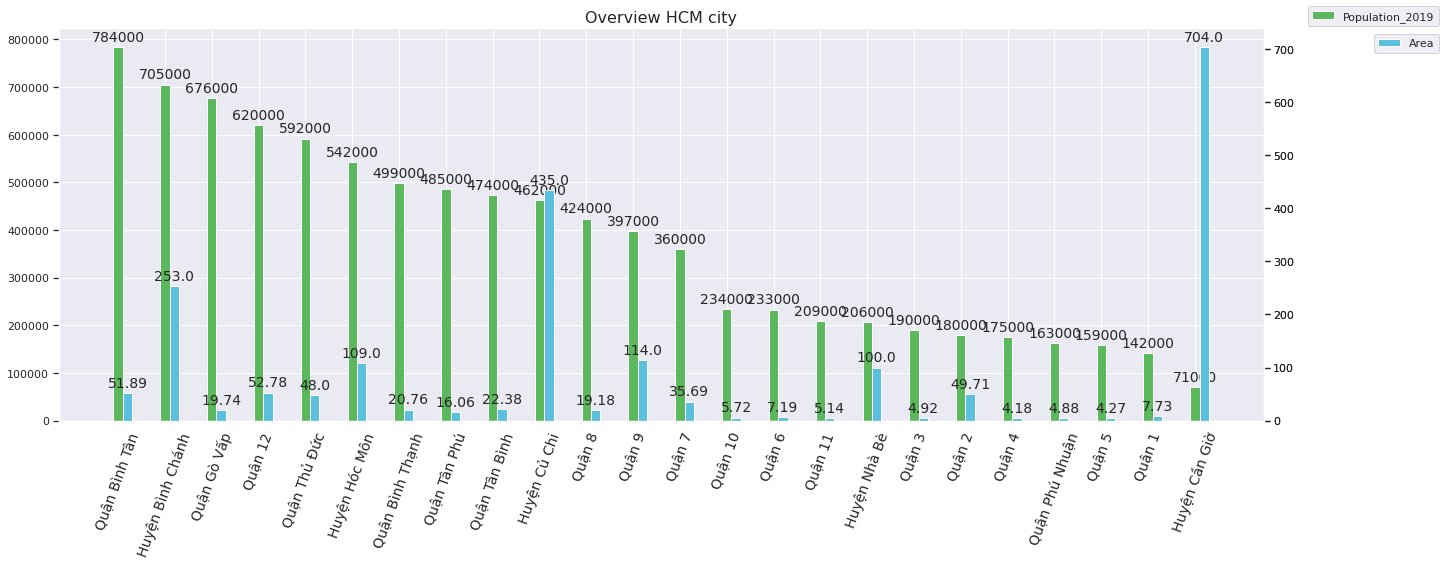

In [ ]:
x = np.arange(len(df_overview.index))
labels=df_overview['District']
width = 0.2  # the width of the bars
a=df_overview['Population_2019']
b=df_overview['Area']
#c=df_overview['Not interested']

fig, ax = plt.subplots(figsize=(20, 8))
rects1 = ax.bar(x, a, width, label=df_overview.columns[3],color='#5cb85c')

ax2 = ax.twinx()

rects2 = ax2.bar(x + width, b, width, label=df_overview.columns[1],color='#5bc0de')
#rects3 = ax.bar(x + 2*width, c, width, label=df.columns[2],color='#d9534f')

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Scores')
ax.set_title('Overview HCM city',fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=70,fontsize=14)
ax.legend(bbox_to_anchor=(1.15, 1.07), loc='upper right')
ax2.legend(bbox_to_anchor=(1.15, 1.0), loc='upper right')
ax2.secondary_yaxis('right')
#ax.spines["left"].set_visible(False)
#ax.spines["top"].set_visible(False)
#ax.spines["right"].set_visible(False)
#ax.get_yaxis().set_visible(False)

def autolabel(rects,ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=14)

autolabel(rects1,ax)
autolabel(rects2,ax2)
#autolabel(rects3)
#plt.legend()
plt.grid(False)
plt.tight_layout()

plt.show()

In [ ]:
df_overview.sort_values(by=['Ward'],ascending=False) # Number of ward

,District,Area,Ward,Population_2019
22,Huyện Củ Chi,435.00,21,462000
12,Quận Bình Thạnh,20.76,20,499000
7,Quận 8,19.18,18,424000
14,Quận Gò Vấp,19.74,16,676000
10,Quận 11,5.14,16,209000
21,Huyện Bình Chánh,253.00,16,705000
3,Quận 4,4.18,15,175000
9,Quận 10,5.72,15,234000
4,Quận 5,4.27,15,159000
15,Quận Phú Nhuận,4.88,15,163000


In [ ]:
df_overview.sort_values(by=['Area'],ascending=False)

,District,Area,Ward,Population_2019
23,Huyện Cần Giờ,704.00,7,71000
22,Huyện Củ Chi,435.00,21,462000
21,Huyện Bình Chánh,253.00,16,705000
8,Quận 9,114.00,13,397000
20,Huyện Hóc Môn,109.00,12,542000
19,Huyện Nhà Bè,100.00,7,206000
11,Quận 12,52.78,11,620000
18,Quận Bình Tân,51.89,10,784000
1,Quận 2,49.71,11,180000
13,Quận Thủ Đức,48.00,12,592000


# Explore Distric 'Quan 9' , this is my current Wards location

In [ ]:
df.head()

,Wards,Post code,District,Latitude,Longitude
0,P. Bến Nghé,71006,Quận 1,10.780833,106.702825
1,P. Đa Kao,71007,Quận 1,10.788890,106.699702
2,P. Tân Định,71008,Quận 1,10.793097,106.690295
3,P. Bến Thành,71009,Quận 1,10.771264,106.692040
4,P. Nguyễn Thái Bình,71010,Quận 1,10.768829,106.699233


In [ ]:
df.District.value_counts()

Quận Bình Thạnh     20
Huyện Củ Chi        17
Quận 11             16
Quận Gò Vấp         16
Quận 8              16
Quận 10             15
Quận Tân Bình       15
Quận 5              15
Quận 4              15
Huyện Bình Chánh    15
Quận Phú Nhuận      15
Quận 3              14
Quận 6              14
Quận 9              13
Quận Thủ Đức        12
Quận 12             11
Quận Tân Phú        11
Quận 2              11
Huyện Hóc Môn       11
Quận 7              10
Quận Bình Tân       10
Quận 1              10
Huyện Cần Giờ        6
Huyện Nhà Bè         5
Name: District, dtype: int64

In [ ]:
District_data = df[df['District'] == 'Quận 9'].reset_index(drop=True)
District_data.head()

,Wards,Post code,District,Latitude,Longitude
0,P. Hiệp Phú,71206,Quận 9,10.841128,106.775386
1,P. Tăng Nhơn Phú A,71207,Quận 9,10.840953,106.797190
2,P. Phước Long A,71208,Quận 9,10.826921,106.762492
3,P. Phước Bình,71209,Quận 9,10.813920,106.769171
4,P. Phước Long B,71210,Quận 9,10.806692,106.782036


In [ ]:
District_data.shape

(13, 5)

### View all Neighboorhoods in Distric 9

In [ ]:
address = 'P. Phước Long B Quan 9' + ' Ho Chi Minh city'
geocode_result = gmaps.geocode(address)
latitude = geocode_result[0]['geometry']['location']['lat']
longitude =geocode_result[0]['geometry']['location']['lng']
print('The geograpical coordinate of North York are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of North York are 10.8066917, 106.7820359.


In [ ]:
# create map of Manhattan using latitude and longitude values
map_District = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(District_data['Latitude'], District_data['Longitude'], District_data['Wards']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_District)  
    
map_District

### Get all venue in District 9 by Foursquare

In [ ]:
path='/content/drive/My Drive/Data/API location file.csv'
CLIENT_ID=pd.read_csv(path).API[4]
CLIENT_SECRET=pd.read_csv(path).API[6]

VERSION = '20200605' # Foursquare API version
#VERSION = '20180605'

In [ ]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        #print(venues_list[3])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Wards', 
                  'Wards Latitude', 
                  'Wards Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    
    return(nearby_venues)

In [ ]:
District_venues = getNearbyVenues(names=District_data['Wards'],
                                   latitudes=District_data['Latitude'],
                                   longitudes=District_data['Longitude']
                                  )

P. Hiệp Phú
P. Tăng Nhơn Phú A
P. Phước Long A
P. Phước Bình
P. Phước Long B
P. Tăng Nhơn Phú B
P. Phú Hữu
P. Long Trường
P. Long Phước
P. Trường Thạnh
P. Long Thạnh Mỹ
P. Long Bình
P. Tân Phú


In [ ]:
District_venues

,Wards,Wards Latitude,Wards Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,P. Hiệp Phú,10.841128,106.775386,Vincom Plaza Lê Văn Việt,10.844397,106.778102,Shopping Mall
1,P. Hiệp Phú,10.841128,106.775386,Quan Toi,10.843976,106.772408,Café
2,P. Hiệp Phú,10.841128,106.775386,Bò bít tết,10.843934,106.772370,Steakhouse
3,P. Hiệp Phú,10.841128,106.775386,Trung Tâm Đăng Kiểm XCG 5004V,10.843962,106.772357,Rental Car Location
4,P. Tăng Nhơn Phú A,10.840953,106.797190,Nhà hàng Châu Long,10.838300,106.794000,Dumpling Restaurant
5,P. Phước Long A,10.826921,106.762492,Tram dung - Nghi Rang Dong,10.825871,106.760955,Rest Area
6,P. Phước Long A,10.826921,106.762492,Sân cỏ nhân tạo Phước Long A,10.828338,106.764363,Football Stadium
7,P. Phước Bình,10.813920,106.769171,Trà Chanh 6k,10.815098,106.769065,Bar
8,P. Phước Bình,10.813920,106.769171,cơm tấm Cây Thị,10.815035,106.771141,Breakfast Spot
9,P. Phước Bình,10.813920,106.769171,Vietnam's Got Talent Stage,10.814250,106.772999,Concert Hall


In [ ]:
len(District_venues.groupby('Wards').count())

10

In [ ]:
len(District_data.groupby('Wards').count())

13

Note: some Wards did not have value form foursquare, so number of Wards is lower than before

In [ ]:
District_venues.to_csv('/content/drive/My Drive/Data/IBM HCM project_Quan 9.csv')

## Begin hear explore Quan 9 Venues (after getting venue infor from Foursquare)

In [ ]:
District_venues=pd.read_csv('/content/drive/My Drive/Data/IBM HCM project_Quan 9.csv',index_col=0)
District_venues

,Wards,Wards Latitude,Wards Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,P. Hiệp Phú,10.841128,106.775386,Vincom Plaza Lê Văn Việt,10.844397,106.778102,Shopping Mall
1,P. Hiệp Phú,10.841128,106.775386,Quan Toi,10.843976,106.772408,Café
2,P. Hiệp Phú,10.841128,106.775386,Bò bít tết,10.843934,106.772370,Steakhouse
3,P. Hiệp Phú,10.841128,106.775386,Trung Tâm Đăng Kiểm XCG 5004V,10.843962,106.772357,Rental Car Location
4,P. Tăng Nhơn Phú A,10.840953,106.797190,Nhà hàng Châu Long,10.838300,106.794000,Dumpling Restaurant
5,P. Phước Long A,10.826921,106.762491,Tram dung - Nghi Rang Dong,10.825871,106.760955,Rest Area
6,P. Phước Long A,10.826921,106.762491,Sân cỏ nhân tạo Phước Long A,10.828338,106.764363,Football Stadium
7,P. Phước Bình,10.813920,106.769171,Trà Chanh 6k,10.815098,106.769065,Bar
8,P. Phước Bình,10.813920,106.769171,cơm tấm Cây Thị,10.815035,106.771141,Breakfast Spot
9,P. Phước Bình,10.813920,106.769171,Vietnam's Got Talent Stage,10.814250,106.772999,Concert Hall


In [ ]:
print('There are {} uniques categories.'.format(len(District_venues['Venue Category'].unique())))
# Park, Food drind, coffee shop

There are 21 uniques categories.


In [ ]:
# one hot encoding
District_venues_onehot = pd.get_dummies(District_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
District_venues_onehot['Wards'] = District_venues['Wards'] 

# move neighborhood column to the first column
fixed_columns = [District_venues_onehot.columns[-1]] + list(District_venues_onehot.columns[:-1])
District_venues_onehot = District_venues_onehot[fixed_columns]

District_venues_onehot.head()

,Wards,Asian Restaurant,Athletics & Sports,Bar,Breakfast Spot,Café,Coffee Shop,Concert Hall,Diner,Dumpling Restaurant,Football Stadium,Fountain,Furniture / Home Store,Garden,Perfume Shop,Rental Car Location,Rest Area,Restaurant,Shopping Mall,Steakhouse,Vietnamese Restaurant,Water Park
0,P. Hiệp Phú,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,P. Hiệp Phú,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,P. Hiệp Phú,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,P. Hiệp Phú,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,P. Tăng Nhơn Phú A,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
District_venues_onehot.shape

(30, 22)

In [ ]:
District_venues_grouped = District_venues_onehot.groupby('Wards').mean().reset_index()
District_venues_grouped.head()
#mean group: sum all value in group and divide total count in group
# purpose: find the most palace appear in each district_neighborhood

,Wards,Asian Restaurant,Athletics & Sports,Bar,Breakfast Spot,Café,Coffee Shop,Concert Hall,Diner,Dumpling Restaurant,Football Stadium,Fountain,Furniture / Home Store,Garden,Perfume Shop,Rental Car Location,Rest Area,Restaurant,Shopping Mall,Steakhouse,Vietnamese Restaurant,Water Park
0,P. Hiệp Phú,0.000000,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.25,0.0,0.0,0.25,0.25,0.000000,0.0
1,P. Long Thạnh Mỹ,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,0.0,0.000000,0.00,0.0,0.0,0.00,0.00,0.666667,0.0
2,P. Long Trường,0.333333,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.333333,0.0,0.333333,0.00,0.0,0.0,0.00,0.00,0.000000,0.0
3,P. Phước Bình,0.000000,0.0,0.2,0.2,0.20,0.0,0.2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.0,0.20,0.00,0.000000,0.0
4,P. Phước Long A,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.5,0.000000,0.000000,0.0,0.000000,0.00,0.5,0.0,0.00,0.00,0.000000,0.0


In [ ]:
num_top_venues = 5

for hood in District_venues_grouped['Wards']:
    print("----"+hood+"----")
    temp = District_venues_grouped[District_venues_grouped['Wards'] == hood].T.reset_index()
    #print(temp)
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----P. Hiệp Phú----
                 venue  freq
0           Steakhouse  0.25
1                 Café  0.25
2        Shopping Mall  0.25
3  Rental Car Location  0.25
4     Asian Restaurant  0.00


----P. Long Thạnh Mỹ----
                    venue  freq
0   Vietnamese Restaurant  0.67
1                Fountain  0.33
2  Furniture / Home Store  0.00
3              Steakhouse  0.00
4           Shopping Mall  0.00


----P. Long Trường----
                    venue  freq
0        Asian Restaurant  0.33
1  Furniture / Home Store  0.33
2            Perfume Shop  0.33
3   Vietnamese Restaurant  0.00
4              Steakhouse  0.00


----P. Phước Bình----
            venue  freq
0             Bar   0.2
1  Breakfast Spot   0.2
2            Café   0.2
3    Concert Hall   0.2
4   Shopping Mall   0.2


----P. Phước Long A----
                    venue  freq
0               Rest Area   0.5
1        Football Stadium   0.5
2        Asian Restaurant   0.0
3  Furniture / Home Store   0.0
4   Vietnamese R

In [ ]:
# Function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### View all popular venue in each neighboorhood

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Wards']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Wards'] = District_venues_grouped['Wards']
#print(neighborhoods_venues_sorted)

for ind in np.arange(District_venues_grouped.shape[0]):
    #print('ind',ind)
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(District_venues_grouped.iloc[ind, :], num_top_venues)
    #print(neighborhoods_venues_sorted)

In [ ]:
neighborhoods_venues_sorted

,Wards,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,P. Hiệp Phú,Steakhouse,Shopping Mall,Rental Car Location,Café,Water Park,Dumpling Restaurant,Athletics & Sports,Bar,Breakfast Spot,Coffee Shop
1,P. Long Thạnh Mỹ,Vietnamese Restaurant,Fountain,Football Stadium,Athletics & Sports,Bar,Breakfast Spot,Café,Coffee Shop,Concert Hall,Diner
2,P. Long Trường,Asian Restaurant,Perfume Shop,Furniture / Home Store,Dumpling Restaurant,Athletics & Sports,Bar,Breakfast Spot,Café,Coffee Shop,Concert Hall
3,P. Phước Bình,Shopping Mall,Bar,Breakfast Spot,Café,Concert Hall,Water Park,Football Stadium,Athletics & Sports,Coffee Shop,Diner
4,P. Phước Long A,Football Stadium,Rest Area,Water Park,Athletics & Sports,Bar,Breakfast Spot,Café,Coffee Shop,Concert Hall,Diner
5,P. Phước Long B,Vietnamese Restaurant,Asian Restaurant,Café,Coffee Shop,Football Stadium,Athletics & Sports,Bar,Breakfast Spot,Concert Hall,Diner
6,P. Trường Thạnh,Garden,Diner,Water Park,Football Stadium,Athletics & Sports,Bar,Breakfast Spot,Café,Coffee Shop,Concert Hall
7,P. Tân Phú,Water Park,Athletics & Sports,Football Stadium,Bar,Breakfast Spot,Café,Coffee Shop,Concert Hall,Diner,Dumpling Restaurant
8,P. Tăng Nhơn Phú A,Dumpling Restaurant,Water Park,Football Stadium,Athletics & Sports,Bar,Breakfast Spot,Café,Coffee Shop,Concert Hall,Diner
9,P. Tăng Nhơn Phú B,Asian Restaurant,Restaurant,Furniture / Home Store,Dumpling Restaurant,Athletics & Sports,Bar,Breakfast Spot,Café,Coffee Shop,Concert Hall


## Find optimal value of Cluster Neighborhoods

In [ ]:
District_venues_grouped_cluster=District_venues_grouped.drop('Wards', 1)
District_venues_grouped_cluster.head()

,Asian Restaurant,Athletics & Sports,Bar,Breakfast Spot,Café,Coffee Shop,Concert Hall,Diner,Dumpling Restaurant,Football Stadium,Fountain,Furniture / Home Store,Garden,Perfume Shop,Rental Car Location,Rest Area,Restaurant,Shopping Mall,Steakhouse,Vietnamese Restaurant,Water Park
0,0.000000,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.25,0.0,0.0,0.25,0.25,0.000000,0.0
1,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,0.0,0.000000,0.00,0.0,0.0,0.00,0.00,0.666667,0.0
2,0.333333,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.333333,0.0,0.333333,0.00,0.0,0.0,0.00,0.00,0.000000,0.0
3,0.000000,0.0,0.2,0.2,0.20,0.0,0.2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.0,0.20,0.00,0.000000,0.0
4,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.5,0.000000,0.000000,0.0,0.000000,0.00,0.5,0.0,0.00,0.00,0.000000,0.0


In [ ]:
n_clusters = 10
#n_init = 10
#max_iter = 300
#tol = 0.0001
#random_state = 2018
#n_jobs = 2

kMeans_inertia = pd.DataFrame(data=[],index=range(2,15), #21
                              columns=['inertia'])
kmeans_per_k = []
k_range = range(2,n_clusters)
for n_clusters in k_range:
    print(n_clusters)
    kmeans = KMeans(n_clusters=n_clusters, 
                    #n_init=n_init,max_iter=max_iter, 
                    #tol=tol, random_state=random_state, n_jobs=n_jobs
                    )
    kmeans.fit(District_venues_grouped_cluster)
    kMeans_inertia.loc[n_clusters] = kmeans.inertia_
    kmeans_per_k.append(kmeans)

2
3
4
5
6
7
8
9


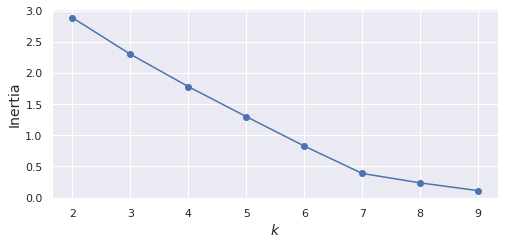

In [ ]:
#k_range = range(2,15)
inertias = [model.inertia_ for model in kmeans_per_k]
#best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
#plt.plot(best_k, best_inertia, "rs")
plt.show()

The elbow is 7, so this is the best optimal cluster value, so I will confirm by another tool below

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
score_df=[]
for n_clusters in k_range:
    #print(n_clusters)
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(District_venues_grouped_cluster)
    score = silhouette_score(District_venues_grouped_cluster, preds)
    score_df.append(score)
    #print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
score_df=pd.DataFrame(score_df)
score_df

,0
0,0.259844
1,0.073106
2,0.138570
3,0.153068
4,0.169912
5,0.192278
6,0.108611
7,0.063917


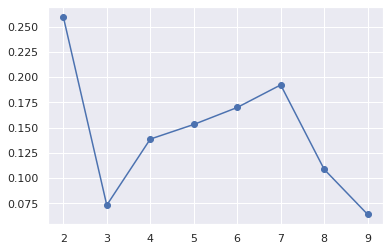

In [ ]:
plt.plot(k_range, score_df, "bo-")

The best cluster value is also 7

## Choose k-means to cluster the neighborhood 

In [ ]:
from collections import Counter
# set number of clusters
kclusters = 7

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(District_venues_grouped_cluster)
Counter(kmeans.labels_)

Counter({0: 2, 1: 2, 2: 1, 3: 1, 4: 1, 5: 2, 6: 1})

In [ ]:
District_data

,Wards,Post code,District,Latitude,Longitude
0,P. Hiệp Phú,71206,Quận 9,10.841128,106.775386
1,P. Tăng Nhơn Phú A,71207,Quận 9,10.840953,106.797190
2,P. Phước Long A,71208,Quận 9,10.826921,106.762492
3,P. Phước Bình,71209,Quận 9,10.813920,106.769171
4,P. Phước Long B,71210,Quận 9,10.806692,106.782036
5,P. Tăng Nhơn Phú B,71211,Quận 9,10.831173,106.783893
6,P. Phú Hữu,71212,Quận 9,10.791452,106.798799
7,P. Long Trường,71213,Quận 9,10.805296,106.816764
8,P. Long Phước,71214,Quận 9,10.802620,106.858521
9,P. Trường Thạnh,71215,Quận 9,10.796039,106.842245


In [ ]:
neighborhoods_venues_sorted

,Wards,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,P. Hiệp Phú,Steakhouse,Shopping Mall,Rental Car Location,Café,Water Park,Dumpling Restaurant,Athletics & Sports,Bar,Breakfast Spot,Coffee Shop
1,P. Long Thạnh Mỹ,Vietnamese Restaurant,Fountain,Football Stadium,Athletics & Sports,Bar,Breakfast Spot,Café,Coffee Shop,Concert Hall,Diner
2,P. Long Trường,Asian Restaurant,Perfume Shop,Furniture / Home Store,Dumpling Restaurant,Athletics & Sports,Bar,Breakfast Spot,Café,Coffee Shop,Concert Hall
3,P. Phước Bình,Shopping Mall,Bar,Breakfast Spot,Café,Concert Hall,Water Park,Football Stadium,Athletics & Sports,Coffee Shop,Diner
4,P. Phước Long A,Football Stadium,Rest Area,Water Park,Athletics & Sports,Bar,Breakfast Spot,Café,Coffee Shop,Concert Hall,Diner
5,P. Phước Long B,Vietnamese Restaurant,Asian Restaurant,Café,Coffee Shop,Football Stadium,Athletics & Sports,Bar,Breakfast Spot,Concert Hall,Diner
6,P. Trường Thạnh,Garden,Diner,Water Park,Football Stadium,Athletics & Sports,Bar,Breakfast Spot,Café,Coffee Shop,Concert Hall
7,P. Tân Phú,Water Park,Athletics & Sports,Football Stadium,Bar,Breakfast Spot,Café,Coffee Shop,Concert Hall,Diner,Dumpling Restaurant
8,P. Tăng Nhơn Phú A,Dumpling Restaurant,Water Park,Football Stadium,Athletics & Sports,Bar,Breakfast Spot,Café,Coffee Shop,Concert Hall,Diner
9,P. Tăng Nhơn Phú B,Asian Restaurant,Restaurant,Furniture / Home Store,Dumpling Restaurant,Athletics & Sports,Bar,Breakfast Spot,Café,Coffee Shop,Concert Hall


In [ ]:
# add clustering labels
neighborhoods_venues_sorted_=neighborhoods_venues_sorted.copy()
neighborhoods_venues_sorted_.insert(0, 'Cluster Labels', kmeans.labels_)

District_merged = District_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
District_merged = District_merged.join(neighborhoods_venues_sorted_.set_index('Wards'), on='Wards')
District_merged=District_merged.dropna()
District_merged['Cluster Labels']=District_merged['Cluster Labels'].astype('int')
District_merged # check the last columns!

,Wards,Post code,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,P. Hiệp Phú,71206,Quận 9,10.841128,106.775386,0,Steakhouse,Shopping Mall,Rental Car Location,Café,Water Park,Dumpling Restaurant,Athletics & Sports,Bar,Breakfast Spot,Coffee Shop
1,P. Tăng Nhơn Phú A,71207,Quận 9,10.840953,106.797190,2,Dumpling Restaurant,Water Park,Football Stadium,Athletics & Sports,Bar,Breakfast Spot,Café,Coffee Shop,Concert Hall,Diner
2,P. Phước Long A,71208,Quận 9,10.826921,106.762492,6,Football Stadium,Rest Area,Water Park,Athletics & Sports,Bar,Breakfast Spot,Café,Coffee Shop,Concert Hall,Diner
3,P. Phước Bình,71209,Quận 9,10.813920,106.769171,0,Shopping Mall,Bar,Breakfast Spot,Café,Concert Hall,Water Park,Football Stadium,Athletics & Sports,Coffee Shop,Diner
4,P. Phước Long B,71210,Quận 9,10.806692,106.782036,5,Vietnamese Restaurant,Asian Restaurant,Café,Coffee Shop,Football Stadium,Athletics & Sports,Bar,Breakfast Spot,Concert Hall,Diner
5,P. Tăng Nhơn Phú B,71211,Quận 9,10.831173,106.783893,1,Asian Restaurant,Restaurant,Furniture / Home Store,Dumpling Restaurant,Athletics & Sports,Bar,Breakfast Spot,Café,Coffee Shop,Concert Hall
7,P. Long Trường,71213,Quận 9,10.805296,106.816764,1,Asian Restaurant,Perfume Shop,Furniture / Home Store,Dumpling Restaurant,Athletics & Sports,Bar,Breakfast Spot,Café,Coffee Shop,Concert Hall
9,P. Trường Thạnh,71215,Quận 9,10.796039,106.842245,4,Garden,Diner,Water Park,Football Stadium,Athletics & Sports,Bar,Breakfast Spot,Café,Coffee Shop,Concert Hall
10,P. Long Thạnh Mỹ,71216,Quận 9,10.842195,106.823737,5,Vietnamese Restaurant,Fountain,Football Stadium,Athletics & Sports,Bar,Breakfast Spot,Café,Coffee Shop,Concert Hall,Diner
12,P. Tân Phú,71218,Quận 9,10.856966,106.803089,3,Water Park,Athletics & Sports,Football Stadium,Bar,Breakfast Spot,Café,Coffee Shop,Concert Hall,Diner,Dumpling Restaurant


In [ ]:
District_merged.shape # drop one row with na value

(10, 16)

In [ ]:
District_data.shape

(13, 5)

### View all cluster in map

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(District_merged['Latitude'], District_merged['Longitude'],
                                  District_merged['Wards'], District_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

In [ ]:
District_merged.head()

,Wards,Post code,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,P. Hiệp Phú,71206,Quận 9,10.841128,106.775386,0,Steakhouse,Shopping Mall,Rental Car Location,Café,Water Park,Dumpling Restaurant,Athletics & Sports,Bar,Breakfast Spot,Coffee Shop
1,P. Tăng Nhơn Phú A,71207,Quận 9,10.840953,106.797190,2,Dumpling Restaurant,Water Park,Football Stadium,Athletics & Sports,Bar,Breakfast Spot,Café,Coffee Shop,Concert Hall,Diner
2,P. Phước Long A,71208,Quận 9,10.826921,106.762492,6,Football Stadium,Rest Area,Water Park,Athletics & Sports,Bar,Breakfast Spot,Café,Coffee Shop,Concert Hall,Diner
3,P. Phước Bình,71209,Quận 9,10.813920,106.769171,0,Shopping Mall,Bar,Breakfast Spot,Café,Concert Hall,Water Park,Football Stadium,Athletics & Sports,Coffee Shop,Diner
4,P. Phước Long B,71210,Quận 9,10.806692,106.782036,5,Vietnamese Restaurant,Asian Restaurant,Café,Coffee Shop,Football Stadium,Athletics & Sports,Bar,Breakfast Spot,Concert Hall,Diner


My current location : P. Phuoc Long B has cluster 5, so I will find all neighboorhoods in cluster 5

### Find all neighboorhoods in cluster 5 (in distric 9)

In [ ]:
Cluster_Labels=5
District_merged.loc[District_merged['Cluster Labels'] == Cluster_Labels,
                    District_merged.columns[[0] + \
                    list(range(5, District_merged.shape[1]))]]

,Wards,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,P. Phước Long B,5,Vietnamese Restaurant,Asian Restaurant,Café,Coffee Shop,Football Stadium,Athletics & Sports,Bar,Breakfast Spot,Concert Hall,Diner
10,P. Long Thạnh Mỹ,5,Vietnamese Restaurant,Fountain,Football Stadium,Athletics & Sports,Bar,Breakfast Spot,Café,Coffee Shop,Concert Hall,Diner


My current location: P. Phuoc Long B is the same as P. Long Thanh My (cluster =5), So if I don't want to stay at my location in distric 9, I will go to P. Long Thanh My in distric 9 also --> good job AI

# Explore and cluster the neighborhoods in all HCM city (VN)

In [ ]:
df=pd.read_csv('/content/drive/My Drive/Data/IBM HCMC project_latitude.csv',index_col=0)
print(df.shape)
df.head()

(313, 5)


,Wards,Post code,District,Latitude,Longitude
0,P. Bến Nghé,71006,Quận 1,10.780833,106.702825
1,P. Đa Kao,71007,Quận 1,10.788890,106.699702
2,P. Tân Định,71008,Quận 1,10.793097,106.690295
3,P. Bến Thành,71009,Quận 1,10.771264,106.692040
4,P. Nguyễn Thái Bình,71010,Quận 1,10.768829,106.699233


In [ ]:
df['Wards_District']=df['Wards']+ ' ' + df['District']
df

,Wards,Post code,District,Latitude,Longitude,Wards_District
0,P. Bến Nghé,71006,Quận 1,10.780833,106.702825,P. Bến Nghé Quận 1
1,P. Đa Kao,71007,Quận 1,10.788890,106.699702,P. Đa Kao Quận 1
2,P. Tân Định,71008,Quận 1,10.793097,106.690295,P. Tân Định Quận 1
3,P. Bến Thành,71009,Quận 1,10.771264,106.692040,P. Bến Thành Quận 1
4,P. Nguyễn Thái Bình,71010,Quận 1,10.768829,106.699233,P. Nguyễn Thái Bình Quận 1
...,...,...,...,...,...,...
312,X. Thạnh An,73308,Huyện Cần Giờ,10.524246,106.971279,X. Thạnh An Huyện Cần Giờ
313,X. Tam Thôn Hiệp,73309,Huyện Cần Giờ,10.603749,106.859567,X. Tam Thôn Hiệp Huyện Cần Giờ
314,X. Bình Khánh,73310,Huyện Cần Giờ,10.663173,106.775339,X. Bình Khánh Huyện Cần Giờ
315,X. An Thới Đông,73311,Huyện Cần Giờ,10.554972,106.806039,X. An Thới Đông Huyện Cần Giờ


In [ ]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        try:    
          # make the GET request
          results = requests.get(url).json()["response"]['groups'][0]['items']
        except:
          continue
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        #print(venues_list[3])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Wards_District', 
                  'Wards Latitude', 
                  'Wards Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    
    return(nearby_venues)

In [ ]:
District_venues = getNearbyVenues(names=df['Wards_District'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

P. Bến Nghé Quận 1
P. Đa Kao Quận 1
P. Tân Định Quận 1
P. Bến Thành Quận 1
P. Nguyễn Thái Bình Quận 1
P. Cầu Ông Lãnh Quận 1
P. Phạm Ngũ Lão Quận 1
P. Cô Giang Quận 1
P. Nguyễn Cư Trinh Quận 1
P. Cầu Kho Quận 1
P. An Phú Quận 2
P. Thảo Điền Quận 2
P. Bình An Quận 2
P. An Khánh Quận 2
P. Thủ Thiêm Quận 2
P. An Lợi Đông Quận 2
P. Bình Khánh Quận 2
P. Bình Trưng Tây Quận 2
P. Thạnh Mỹ Lợi Quận 2
P. Cát Lái Quận 2
P. Bình Trưng Đông Quận 2
P. Hiệp Phú Quận 9
P. Tăng Nhơn Phú A Quận 9
P. Phước Long A Quận 9
P. Phước Bình Quận 9
P. Phước Long B Quận 9
P. Tăng Nhơn Phú B Quận 9
P. Phú Hữu Quận 9
P. Long Trường Quận 9
P. Long Phước Quận 9
P. Trường Thạnh Quận 9
P. Long Thạnh Mỹ Quận 9
P. Long Bình Quận 9
P. Tân Phú Quận 9
P. Bình Thọ Quận Thủ Đức
P. Linh Chiểu Quận Thủ Đức
P. Linh Trung Quận Thủ Đức
P. Linh Xuân Quận Thủ Đức
P. Linh Tây Quận Thủ Đức
P. Tam Phú Quận Thủ Đức
P. Tam Bình Quận Thủ Đức
P. Bình Chiểu Quận Thủ Đức
P. Hiệp Bình Phước Quận Thủ Đức
P. Hiệp Bình Chánh Quận Thủ Đức
P. Lin

In [ ]:
District_venues.head()

,Wards_District,Wards Latitude,Wards Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,P. Bến Nghé Quận 1,10.780833,106.702825,Heart Of Darkness,10.779781,106.702999,Bar
1,P. Bến Nghé Quận 1,10.780833,106.702825,Quan Chi Hoa Vietnamese Cuisine,10.779048,106.703471,Vietnamese Restaurant
2,P. Bến Nghé Quận 1,10.780833,106.702825,Miu Miu Spa,10.781715,106.704754,Spa
3,P. Bến Nghé Quận 1,10.780833,106.702825,Pacey Cupcakes,10.780202,106.700773,Cupcake Shop
4,P. Bến Nghé Quận 1,10.780833,106.702825,Club Lounge @ InterContinental Saigon,10.780975,106.700968,Hotel Bar


In [ ]:
District_venues.to_csv('/content/drive/My Drive/Data/IBM Toroto project_all HCM_city_foursquare.csv')

## Begin hear explore all HCM city venue (after getting venue infor from Foursquare)

In [ ]:
District_venues=pd.read_csv('/content/drive/My Drive/Data/IBM Toroto project_all HCM_city_foursquare.csv',index_col=0)
print(District_venues.shape)
District_venues.head()

(3122, 7)


,Wards_District,Wards Latitude,Wards Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,P. Bến Nghé Quận 1,10.780833,106.702825,Heart Of Darkness,10.779781,106.702999,Bar
1,P. Bến Nghé Quận 1,10.780833,106.702825,Quan Chi Hoa Vietnamese Cuisine,10.779048,106.703471,Vietnamese Restaurant
2,P. Bến Nghé Quận 1,10.780833,106.702825,Miu Miu Spa,10.781715,106.704754,Spa
3,P. Bến Nghé Quận 1,10.780833,106.702825,Pacey Cupcakes,10.780202,106.700773,Cupcake Shop
4,P. Bến Nghé Quận 1,10.780833,106.702825,Club Lounge @ InterContinental Saigon,10.780975,106.700968,Hotel Bar


In [ ]:
print('There are {} uniques categories.'.format(len(District_venues['Venue Category'].unique())))
# Park, Food drind, coffee shop

There are 191 uniques categories.


In [ ]:
# one hot encoding
District_venues_onehot = pd.get_dummies(District_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
District_venues_onehot['Wards_District'] = District_venues['Wards_District'] 

# move neighborhood column to the first column
fixed_columns = [District_venues_onehot.columns[-1]] + list(District_venues_onehot.columns[:-1])
District_venues_onehot = District_venues_onehot[fixed_columns]

District_venues_onehot.head()

,Wards_District,Airport Food Court,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Bathing Area,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Line,Bus Station,Business Service,Cafeteria,Café,...,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shoe Repair,Shoe Store,Shop & Service,Shopping Mall,Snack Place,Soccer Field,Soup Place,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Temple,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Track,Trail,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Wings Joint,Yoga Studio
0,P. Bến Nghé Quận 1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,P. Bến Nghé Quận 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,P. Bến Nghé Quận 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,P. Bến Nghé Quận 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,P. Bến Nghé Quận 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
District_venues_onehot.shape

(3122, 192)

In [ ]:
District_venues_grouped = District_venues_onehot.groupby('Wards_District').mean().reset_index()
District_venues_grouped.head()
#mean group: sum all value in group and divide total count in group
# purpose: find the most palace appear in each district_neighborhood

,Wards_District,Airport Food Court,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Bathing Area,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Line,Bus Station,Business Service,Cafeteria,Café,...,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shoe Repair,Shoe Store,Shop & Service,Shopping Mall,Snack Place,Soccer Field,Soup Place,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Temple,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Track,Trail,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Wings Joint,Yoga Studio
0,P. 1 Quận 10,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.058824,...,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176471,0.0,0.0,0.0,0.0,0.0
1,P. 1 Quận 11,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0
2,P. 1 Quận 3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.058824,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.058824,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117647,0.0,0.0,0.0,0.0,0.0
3,P. 1 Quận 4,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.166667,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0
4,P. 1 Quận 5,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.125000,...,0.0,0.0,0.0,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
District_venues_grouped.shape
# Some wards did not have value in foursquare so number of wards is lower than normal

(264, 192)

### View all popular venue in each neighboorhood

In [ ]:
num_top_venues = 5

for hood in District_venues_grouped['Wards_District']:
    print("----"+hood+"----")
    temp = District_venues_grouped[District_venues_grouped['Wards_District'] == hood].T.reset_index()
    #print(temp)
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----P. 1 Quận 10----
                   venue  freq
0  Vietnamese Restaurant  0.18
1      Hotpot Restaurant  0.06
2      Electronics Store  0.06
3            Flower Shop  0.06
4     Seafood Restaurant  0.06


----P. 1 Quận 11----
                   venue  freq
0  Vietnamese Restaurant   0.5
1           Dessert Shop   0.5
2     Airport Food Court   0.0
3              Pet Store   0.0
4           Noodle House   0.0


----P. 1 Quận 3----
                   venue  freq
0           Dessert Shop  0.12
1  Vietnamese Restaurant  0.12
2      Hotpot Restaurant  0.06
3                 Bakery  0.06
4                   Park  0.06


----P. 1 Quận 4----
                   venue  freq
0       Asian Restaurant  0.33
1      Convenience Store  0.17
2     Athletics & Sports  0.17
3  Vietnamese Restaurant  0.17
4            Coffee Shop  0.17


----P. 1 Quận 5----
                venue  freq
0         Coffee Shop  0.25
1        Noodle House  0.12
2         Karaoke Bar  0.12
3    Asian Restaurant  0.12
4  Chi

In [ ]:
District_venues_grouped

,Wards_District,Airport Food Court,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Bathing Area,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Line,Bus Station,Business Service,Cafeteria,Café,...,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shoe Repair,Shoe Store,Shop & Service,Shopping Mall,Snack Place,Soccer Field,Soup Place,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Temple,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Track,Trail,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Wings Joint,Yoga Studio
0,P. 1 Quận 10,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.058824,...,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176471,0.0,0.0,0.0,0.0,0.0
1,P. 1 Quận 11,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0
2,P. 1 Quận 3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.058824,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.058824,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117647,0.0,0.0,0.0,0.0,0.0
3,P. 1 Quận 4,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.166667,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0
4,P. 1 Quận 5,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.125000,...,0.0,0.0,0.0,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,X. Tân An Hội Huyện Củ Chi,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0
260,X. Tân Kiên Huyện Bình Chánh,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
# Function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Wards_District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Wards_District'] = District_venues_grouped['Wards_District']
#print(neighborhoods_venues_sorted)

for ind in np.arange(District_venues_grouped.shape[0]):
    #print('ind',ind)
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(District_venues_grouped.iloc[ind, :], num_top_venues)
    #print(neighborhoods_venues_sorted)

neighborhoods_venues_sorted

,Wards_District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,P. 1 Quận 10,Vietnamese Restaurant,Hotpot Restaurant,Café,Food,Noodle House,Food Truck,French Restaurant,Electronics Store,Seafood Restaurant,Bus Line
1,P. 1 Quận 11,Vietnamese Restaurant,Dessert Shop,Yoga Studio,Dumpling Restaurant,Food,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farm
2,P. 1 Quận 3,Vietnamese Restaurant,Dessert Shop,Hotpot Restaurant,Korean Restaurant,Food Truck,French Restaurant,Electronics Store,Park,Café,Market
3,P. 1 Quận 4,Asian Restaurant,Convenience Store,Coffee Shop,Vietnamese Restaurant,Athletics & Sports,Dumpling Restaurant,Food,Flower Shop,Flea Market,Fish & Chips Shop
4,P. 1 Quận 5,Coffee Shop,Café,Noodle House,Asian Restaurant,Chinese Restaurant,Karaoke Bar,Seafood Restaurant,Dumpling Restaurant,Flea Market,Fish & Chips Shop
...,...,...,...,...,...,...,...,...,...,...,...
259,X. Tân An Hội Huyện Củ Chi,Vietnamese Restaurant,Asian Restaurant,Yoga Studio,Dumpling Restaurant,Food,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farm
260,X. Tân Kiên Huyện Bình Chánh,Soccer Field,Yoga Studio,Comic Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farm,Fabric Shop
261,X. Tân Xuân Huyện Hóc Môn,Food Truck,Soup Place,Arts & Crafts Store,Asian Restaurant,Café,Eastern European Restaurant,Food,Flower Shop,Flea Market,Fish & Chips Shop
262,X. Xuân Thới Đông Huyện Hóc Môn,Vietnamese Restaurant,Food Court,Yoga Studio,Dumpling Restaurant,Food,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farm


## Find optimal value of Cluster Neighborhoods

In [ ]:
District_venues_grouped_cluster=District_venues_grouped.drop('Wards_District', 1)
District_venues_grouped_cluster.head()

,Airport Food Court,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Bathing Area,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Line,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,...,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shoe Repair,Shoe Store,Shop & Service,Shopping Mall,Snack Place,Soccer Field,Soup Place,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Temple,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Track,Trail,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Wings Joint,Yoga Studio
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.058824,0.0,...,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176471,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.058824,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.058824,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117647,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.166667,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.125000,0.0,...,0.0,0.0,0.0,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
n_clusters = 30
#n_init = 10
#max_iter = 300
#tol = 0.0001
#random_state = 2018
#n_jobs = 2

kMeans_inertia = pd.DataFrame(data=[],index=range(2,15), #21
                              columns=['inertia'])
kmeans_per_k = []
k_range = range(2,n_clusters)
for n_clusters in k_range:
    print(n_clusters)
    kmeans = KMeans(n_clusters=n_clusters, 
                    #n_init=n_init,max_iter=max_iter, 
                    #tol=tol, random_state=random_state, n_jobs=n_jobs
                    )
    kmeans.fit(District_venues_grouped_cluster)
    kMeans_inertia.loc[n_clusters] = kmeans.inertia_
    kmeans_per_k.append(kmeans)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


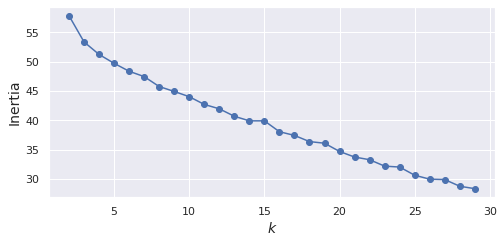

In [ ]:
#k_range = range(2,15)
inertias = [model.inertia_ for model in kmeans_per_k]
#best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
#plt.plot(best_k, best_inertia, "rs")
plt.show()

Very hard to see elbow, so I will use another tool to find optimal value

In [ ]:
k_range

range(2, 30)

In [ ]:
score_df=[]
for n_clusters in k_range:
    #print(n_clusters)
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(District_venues_grouped_cluster)
    score = silhouette_score(District_venues_grouped_cluster, preds)
    score_df.append(score)
    #print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
score_df=pd.DataFrame(score_df)
score_df

,0
0,0.214163
1,0.086367
2,0.063482
3,0.059873
4,0.075940
5,0.041227
6,0.045251
7,0.041562
8,0.054828
9,0.018922


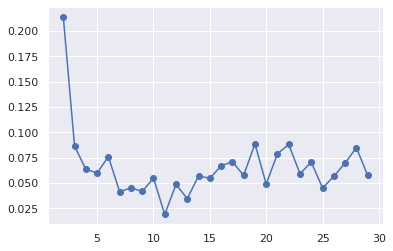

In [ ]:
plt.plot(k_range, score_df, "bo-")

Best score: 28 cluster

## Run k-means to cluster the neighborhood 

In [ ]:
# set number of clusters
kclusters = 28

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(District_venues_grouped_cluster)
# check cluster labels generated for each row in the dataframe
Counter(kmeans.labels_)

Counter({0: 18,
         1: 46,
         2: 6,
         3: 21,
         4: 31,
         5: 7,
         6: 1,
         7: 2,
         8: 11,
         9: 1,
         10: 1,
         11: 10,
         12: 1,
         13: 1,
         14: 15,
         15: 1,
         16: 4,
         17: 3,
         18: 1,
         19: 9,
         20: 20,
         21: 5,
         22: 1,
         23: 1,
         24: 2,
         25: 1,
         26: 37,
         27: 7})

In [ ]:
District_venues_grouped

,Wards_District,Airport Food Court,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Bathing Area,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Line,Bus Station,Business Service,Cafeteria,Café,...,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shoe Repair,Shoe Store,Shop & Service,Shopping Mall,Snack Place,Soccer Field,Soup Place,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Temple,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Track,Trail,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Wings Joint,Yoga Studio
0,P. 1 Quận 10,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.058824,...,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176471,0.0,0.0,0.0,0.0,0.0
1,P. 1 Quận 11,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0
2,P. 1 Quận 3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.058824,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.058824,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117647,0.0,0.0,0.0,0.0,0.0
3,P. 1 Quận 4,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.166667,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0
4,P. 1 Quận 5,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.125000,...,0.0,0.0,0.0,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,X. Tân An Hội Huyện Củ Chi,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0
260,X. Tân Kiên Huyện Bình Chánh,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
df

,Wards,Post code,District,Latitude,Longitude,Wards_District
0,P. Bến Nghé,71006,Quận 1,10.780833,106.702825,P. Bến Nghé Quận 1
1,P. Đa Kao,71007,Quận 1,10.788890,106.699702,P. Đa Kao Quận 1
2,P. Tân Định,71008,Quận 1,10.793097,106.690295,P. Tân Định Quận 1
3,P. Bến Thành,71009,Quận 1,10.771264,106.692040,P. Bến Thành Quận 1
4,P. Nguyễn Thái Bình,71010,Quận 1,10.768829,106.699233,P. Nguyễn Thái Bình Quận 1
...,...,...,...,...,...,...
312,X. Thạnh An,73308,Huyện Cần Giờ,10.524246,106.971279,X. Thạnh An Huyện Cần Giờ
313,X. Tam Thôn Hiệp,73309,Huyện Cần Giờ,10.603749,106.859567,X. Tam Thôn Hiệp Huyện Cần Giờ
314,X. Bình Khánh,73310,Huyện Cần Giờ,10.663173,106.775339,X. Bình Khánh Huyện Cần Giờ
315,X. An Thới Đông,73311,Huyện Cần Giờ,10.554972,106.806039,X. An Thới Đông Huyện Cần Giờ


In [ ]:
print(District_venues_grouped.shape)
print(df.shape) # District data group neighborhoods is the same lenght as neighborhoods_vene
# may be some neighborhoods is the same name in each district (93 # 101)
# Some neighboorhoods did not have value in foursquare, so the number neighboorhoods is lower than before

(264, 192)
(313, 6)


In [ ]:
# add clustering labels
neighborhoods_venues_sorted_=neighborhoods_venues_sorted.copy()
neighborhoods_venues_sorted_.insert(0, 'Cluster Labels', kmeans.labels_)

District_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
District_merged = District_merged.join(neighborhoods_venues_sorted_.set_index('Wards_District'), on='Wards_District')
District_merged=District_merged.dropna()
District_merged['Cluster Labels']=District_merged['Cluster Labels'].astype('int')
District_merged # check the last columns!

,Wards,Post code,District,Latitude,Longitude,Wards_District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,P. Bến Nghé,71006,Quận 1,10.780833,106.702825,P. Bến Nghé Quận 1,26,Hotel,Coffee Shop,Café,Massage Studio,Bar,Vietnamese Restaurant,Asian Restaurant,French Restaurant,Ramen Restaurant,Spa
1,P. Đa Kao,71007,Quận 1,10.788890,106.699702,P. Đa Kao Quận 1,3,Café,Vietnamese Restaurant,Japanese Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Beer Garden,Seafood Restaurant,Breakfast Spot,BBQ Joint
2,P. Tân Định,71008,Quận 1,10.793097,106.690295,P. Tân Định Quận 1,1,Vietnamese Restaurant,Café,Coffee Shop,Vegetarian / Vegan Restaurant,Asian Restaurant,Breakfast Spot,Yoga Studio,Snack Place,Spa,Food Truck
3,P. Bến Thành,71009,Quận 1,10.771264,106.692040,P. Bến Thành Quận 1,26,Hotel,Vietnamese Restaurant,Sandwich Place,Coffee Shop,Juice Bar,Hostel,Café,Comfort Food Restaurant,Massage Studio,Lounge
4,P. Nguyễn Thái Bình,71010,Quận 1,10.768829,106.699233,P. Nguyễn Thái Bình Quận 1,1,Vietnamese Restaurant,Hotel,Café,Burger Joint,Coffee Shop,BBQ Joint,Beer Bar,Korean Restaurant,Ice Cream Shop,Japanese Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,X. Phước Kiển,73207,Huyện Nhà Bè,10.707190,106.705773,X. Phước Kiển Huyện Nhà Bè,4,Coffee Shop,Pool,Café,Yoga Studio,Dumpling Restaurant,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farm
309,X. Long Thới,73211,Huyện Nhà Bè,10.651512,106.729361,X. Long Thới Huyện Nhà Bè,20,Electronics Store,Yoga Studio,Dumpling Restaurant,Food,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farm,Fabric Shop
313,X. Tam Thôn Hiệp,73309,Huyện Cần Giờ,10.603749,106.859567,X. Tam Thôn Hiệp Huyện Cần Giờ,24,Club House,Athletics & Sports,Sports Club,Yoga Studio,Eastern European Restaurant,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop
314,X. Bình Khánh,73310,Huyện Cần Giờ,10.663173,106.775339,X. Bình Khánh Huyện Cần Giờ,20,Resort,Coffee Shop,Department Store,Yoga Studio,Dumpling Restaurant,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farm


### View all cluster in map

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(District_merged['Latitude'], District_merged['Longitude'],
                                  District_merged['Wards_District'], District_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

In [ ]:
District_merged.head()

,Wards,Post code,District,Latitude,Longitude,Wards_District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,P. Bến Nghé,71006,Quận 1,10.780833,106.702825,P. Bến Nghé Quận 1,26,Hotel,Coffee Shop,Café,Massage Studio,Bar,Vietnamese Restaurant,Asian Restaurant,French Restaurant,Ramen Restaurant,Spa
1,P. Đa Kao,71007,Quận 1,10.788890,106.699702,P. Đa Kao Quận 1,3,Café,Vietnamese Restaurant,Japanese Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Beer Garden,Seafood Restaurant,Breakfast Spot,BBQ Joint
2,P. Tân Định,71008,Quận 1,10.793097,106.690295,P. Tân Định Quận 1,1,Vietnamese Restaurant,Café,Coffee Shop,Vegetarian / Vegan Restaurant,Asian Restaurant,Breakfast Spot,Yoga Studio,Snack Place,Spa,Food Truck
3,P. Bến Thành,71009,Quận 1,10.771264,106.692040,P. Bến Thành Quận 1,26,Hotel,Vietnamese Restaurant,Sandwich Place,Coffee Shop,Juice Bar,Hostel,Café,Comfort Food Restaurant,Massage Studio,Lounge
4,P. Nguyễn Thái Bình,71010,Quận 1,10.768829,106.699233,P. Nguyễn Thái Bình Quận 1,1,Vietnamese Restaurant,Hotel,Café,Burger Joint,Coffee Shop,BBQ Joint,Beer Bar,Korean Restaurant,Ice Cream Shop,Japanese Restaurant


## Find neighboorhoods that same as neighboorhood Phước Long B

In [ ]:
District_merged[District_merged.Wards == 'P. Phước Long B']  

,Wards,Post code,District,Latitude,Longitude,Wards_District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,P. Phước Long B,71210,Quận 9,10.806692,106.782036,P. Phước Long B Quận 9,3,Vietnamese Restaurant,Coffee Shop,Asian Restaurant,Café,Yoga Studio,Dumpling Restaurant,Food,Flower Shop,Flea Market,Fish & Chips Shop


This is cluster 3

### Find all neighboorhoods in cluster 3

In [ ]:
Cluster_Labels=3
District_with_cluster= District_merged.loc[District_merged['Cluster Labels'] == Cluster_Labels,
                      District_merged.columns[list(range(3, District_merged.shape[1]))]]
District_with_cluster

,Latitude,Longitude,Wards_District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,10.788890,106.699702,P. Đa Kao Quận 1,3,Café,Vietnamese Restaurant,Japanese Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Beer Garden,Seafood Restaurant,Breakfast Spot,BBQ Joint
16,10.785262,106.730631,P. Bình Khánh Quận 2,3,Vietnamese Restaurant,Café,Athletics & Sports,Badminton Court,Dumpling Restaurant,Food,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant
17,10.784463,106.760324,P. Bình Trưng Tây Quận 2,3,Café,Vietnamese Restaurant,Playground,Mobile Phone Shop,Vegetarian / Vegan Restaurant,Yoga Studio,Dive Bar,Flea Market,Fish & Chips Shop,Fast Food Restaurant
25,10.806692,106.782036,P. Phước Long B Quận 9,3,Vietnamese Restaurant,Coffee Shop,Asian Restaurant,Café,Yoga Studio,Dumpling Restaurant,Food,Flower Shop,Flea Market,Fish & Chips Shop
59,10.842266,106.654643,P. 8 Quận Gò Vấp,3,Vietnamese Restaurant,BBQ Joint,Café,Food Court,Yoga Studio,Eastern European Restaurant,Food,Flower Shop,Flea Market,Fish & Chips Shop
102,10.868357,106.605924,X. Trung Chánh Huyện Hóc Môn,3,Café,Vietnamese Restaurant,Asian Restaurant,BBQ Joint,Dumpling Restaurant,Food,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant
130,10.792329,106.632563,P. Tân Thành Quận Tân Phú,3,Coffee Shop,Vietnamese Restaurant,Café,Flea Market,Yoga Studio,Dumpling Restaurant,Food,Flower Shop,Fish & Chips Shop,Fast Food Restaurant
132,10.814704,106.624506,P. Tây Thạnh Quận Tân Phú,3,Diner,Vietnamese Restaurant,Café,Dumpling Restaurant,Food,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farm
138,10.764853,106.632359,P. Tân Thới Hoà Quận Tân Phú,3,Food Truck,Vietnamese Restaurant,Café,Dumpling Restaurant,Food,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farm
144,10.805869,106.643867,P. 13 Quận Tân Bình,3,Sporting Goods Shop,Vietnamese Restaurant,Pizza Place,Café,Dive Bar,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farm


My current location: P. Phuoc Long B (Distric 9) is the same as many neighboorhoods in district 2, 3, 7,8, 10, Phu Nhuan....  So I can decide go to these location for my job and it will not effect to my life

### Location of this cluster in map

In [ ]:
# create map of Manhattan using latitude and longitude values
map_District = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(District_with_cluster['Latitude'], District_with_cluster['Longitude'], District_with_cluster['Wards_District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_District)  
    
map_District